# 1)Problem Understanding

# 2) Data Preprocessing

In [1]:
# importing neccessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [287]:
df1=pd.read_csv('Train_Claim.csv')

In [3]:
print(df1.shape)
df1.head()

(28836, 19)


,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,66755,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,66243,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,53544,8829,7234,37481


In [4]:
df2=pd.read_csv('Train_Demographics.csv')

In [5]:
df2.shape

(28836, 10)

In [6]:
df3=pd.read_csv('Train_Policy.csv')

In [7]:
df3.columns

Index(['InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'CustomerID'],
      dtype='object')

In [8]:
df3.shape

(28836, 10)

In [9]:
#Train vehicle dataset having a mixed values so, I have filter that and make it as a new dataframe.

In [10]:
df4=pd.read_csv('Train_Vehicle.csv')

In [11]:
df4.shape

(115344, 3)

In [12]:
#Creating an VechileID column
v_id=df4.loc[df4.VehicleAttribute=='VehicleID']
v_id['VehicleID']=v_id['VehicleAttributeDetails']
v_id.drop(['VehicleAttribute','VehicleAttributeDetails'],axis=1,inplace=True)

In [13]:
v_id.head()

,CustomerID,VehicleID
0,Cust20179,Vehicle8898
4,Cust13038,Vehicle30212
5,Cust1801,Vehicle24096
10,Cust14947,Vehicle15216
16,Cust19144,Vehicle29018


In [14]:
#creating VehicleModel column
vm=df4.loc[df4.VehicleAttribute=='VehicleModel']
vm['VehicleModel']=vm['VehicleAttributeDetails']
vm.drop(['VehicleAttribute','VehicleAttributeDetails'],axis=1,inplace=True)

In [15]:
#creating VehicleMake column
v_make=df4.loc[df4.VehicleAttribute=='VehicleMake']
v_make['VehicleMake']=v_make['VehicleAttributeDetails']
v_make.drop(['VehicleAttribute','VehicleAttributeDetails'],axis=1,inplace=True)

In [16]:
#creating VehicleYOM column
v_yom=df4.loc[df4.VehicleAttribute=='VehicleYOM']
v_yom['VehicleYOM']=v_yom['VehicleAttributeDetails']
v_yom.drop(['VehicleAttribute','VehicleAttributeDetails'],axis=1,inplace=True)

In [17]:
d1=v_id.merge(vm)
d2=v_make.merge(v_yom)

df5=d1.merge(d2)

In [18]:
df5

,CustomerID,VehicleID,VehicleModel,VehicleMake,VehicleYOM
0,Cust20179,Vehicle8898,Forrestor,BMW,2011
1,Cust13038,Vehicle30212,Maxima,Toyota,2000
2,Cust1801,Vehicle24096,MDX,Accura,1999
3,Cust14947,Vehicle15216,Ultima,Nissan,1998
4,Cust19144,Vehicle29018,Fusion,Ford,2011
...,...,...,...,...,...
28831,Cust2970,Vehicle19228,Pathfinder,Audi,2003
28832,Cust19731,Vehicle12644,Malibu,Chevrolet,2014
28833,Cust25338,Vehicle28831,95,Saab,2011
28834,Cust7637,Vehicle12870,Fusion,Ford,2008


In [19]:
df6=pd.read_csv('Traindata_with_Target.csv')

In [20]:
df6

,CustomerID,ReportedFraud
0,Cust20065,N
1,Cust37589,N
2,Cust24312,N
3,Cust5493,Y
4,Cust7704,Y
...,...,...
28831,Cust9773,N
28832,Cust38439,N
28833,Cust38444,N
28834,Cust26466,N


## Merging all datasets 

In [21]:
# We are merging different dataset into one 
m1=df1.merge(df2)
m2=df3.merge(df5)

df_n=m1.merge(m2)

#df_new have all columns
df_new=df_n.merge(df6)

In [22]:
df_new.shape

(28836, 42)

In [23]:
df_new.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleModel,VehicleMake,VehicleYOM,ReportedFraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,100/300,1000,1632.73,0,not-in-family,Vehicle26917,A5,Audi,2008,N
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,100/300,1000,1255.19,0,not-in-family,Vehicle15893,A5,Audi,2006,N
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,500/1000,617,1373.38,0,wife,Vehicle5152,Jetta,Volkswagen,1999,N
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,...,500/1000,722,1337.60,0,own-child,Vehicle37363,Jetta,Volkswagen,2003,N
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,...,100/300,500,1353.73,4279863,unmarried,Vehicle28633,CRV,Toyota,2010,N


In [24]:
#To check data type of each column we can use info()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  28836 non-null  object 
 1   DateOfIncident              28836 non-null  object 
 2   TypeOfIncident              28836 non-null  object 
 3   TypeOfCollission            28836 non-null  object 
 4   SeverityOfIncident          28836 non-null  object 
 5   AuthoritiesContacted        28836 non-null  object 
 6   IncidentState               28836 non-null  object 
 7   IncidentCity                28836 non-null  object 
 8   IncidentAddress             28836 non-null  object 
 9   IncidentTime                28836 non-null  int64  
 10  NumberOfVehicles            28836 non-null  int64  
 11  PropertyDamage              28836 non-null  object 
 12  BodilyInjuries              28836 non-null  int64  
 13  Witnesses                   288

In [25]:
df_new.columns

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'InsuredAge', 'InsuredZipCode',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'CapitalGains', 'CapitalLoss', 'Country',
       'InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'VehicleID', 'VehicleModel', 'VehicleMake', 'VehicleYOM',
       'ReportedFraud'],
      dtype='object')

In [26]:
print(df_new.loc[df_new['PolicyAnnualPremium']==-1].shape)
print(df_new.loc[df_new['TypeOfCollission']=='?'].shape)
print(df_new.loc[df_new['IncidentTime']==-5].shape)
print(df_new.loc[df_new['PropertyDamage']=='?'].shape)
print(df_new.loc[df_new['Witnesses']=='MISSINGVALUE'].shape)
print(df_new.loc[df_new['PoliceReport']=='?'].shape)
print(df_new.loc[df_new['AmountOfTotalClaim']=='MISSEDDATA'].shape)
print(df_new[df_new['VehicleID']=='???'].shape)
print(df_new[df_new['VehicleModel']=='???'].shape)
print(df_new[df_new['VehicleMake']=='???'].shape)
print(df_new[df_new['VehicleYOM']=='???'].shape)

(141, 42)
(5162, 42)
(31, 42)
(10459, 42)
(46, 42)
(9805, 42)
(50, 42)
(0, 42)
(0, 42)
(50, 42)
(0, 42)


## Replacing NaN 

In [27]:
# We are replacing noise values with nan for imputing the missing values 
df_new.replace('?',np.nan,inplace=True)
df_new.replace(-1.0,np.nan,inplace=True)
df_new.replace(-5.0,np.nan,inplace=True)
df_new.replace('MISSINGVAL',np.nan,inplace=True)
df_new.replace('MISSINGVALUE',np.nan,inplace=True)
df_new.replace('MISSEDDATA',np.nan,inplace=True)
df_new.replace('???',np.nan,inplace=True)

In [28]:
# I converted 
df_new.to_csv('merged_data1.csv',index=False)

In [29]:
df_new.isnull().sum()

CustomerID                        0
DateOfIncident                    0
TypeOfIncident                    0
TypeOfCollission               5162
SeverityOfIncident                0
AuthoritiesContacted              0
IncidentState                     0
IncidentCity                      0
IncidentAddress                   0
IncidentTime                     31
NumberOfVehicles                  0
PropertyDamage                10459
BodilyInjuries                    0
Witnesses                        46
PoliceReport                   9805
AmountOfTotalClaim               50
AmountOfInjuryClaim               0
AmountOfPropertyClaim             0
AmountOfVehicleDamage             0
InsuredAge                        0
InsuredZipCode                    0
InsuredGender                    30
InsuredEducationLevel             0
InsuredOccupation                 0
InsuredHobbies                    0
CapitalGains                      0
CapitalLoss                       0
Country                     

In [30]:
#Changing AmountOfTotalClaim datatype into int
#we are replacing -2 for amount of total claim column because I need to impute this column later

df_new['AmountOfTotalClaim']=df_new['AmountOfTotalClaim'].fillna(-2)
df_new['AmountOfTotalClaim'] = df_new['AmountOfTotalClaim'].astype('int64')

# Visualization

### i)TypeOfIncident Column

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Multi-vehicle Collision'),
  Text(1, 0, 'Single Vehicle Collision'),
  Text(2, 0, 'Parked Car'),
  Text(3, 0, 'Vehicle Theft')])

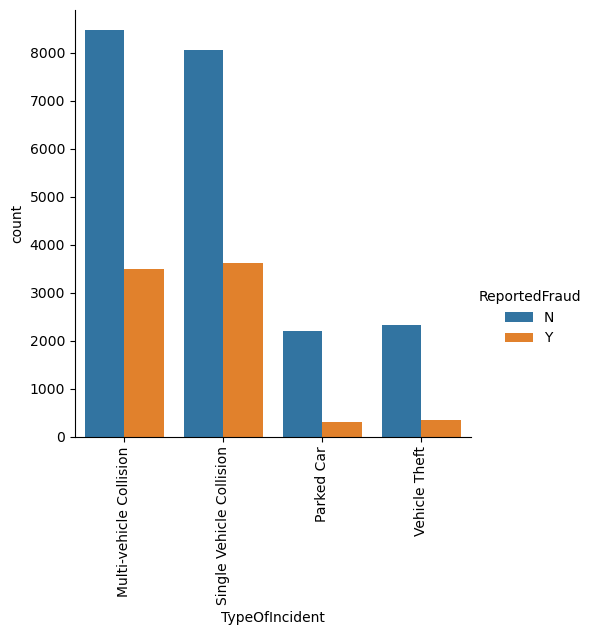

In [31]:
sns.catplot(data=df_new,x='TypeOfIncident',hue='ReportedFraud',kind='count')
plt.xticks(rotation=90)

### ii)TypeOfCollission Column

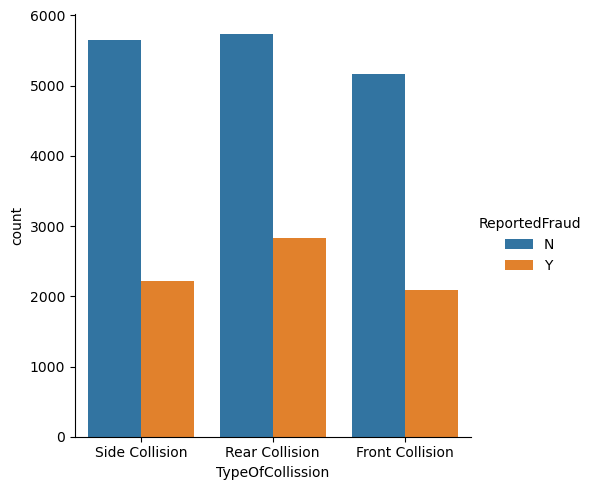

In [32]:
sns.catplot(data=df_new,x='TypeOfCollission',hue='ReportedFraud',kind='count')

### iii)SeverityOfIncident column

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Total Loss'),
  Text(1, 0, 'Minor Damage'),
  Text(2, 0, 'Major Damage'),
  Text(3, 0, 'Trivial Damage')])

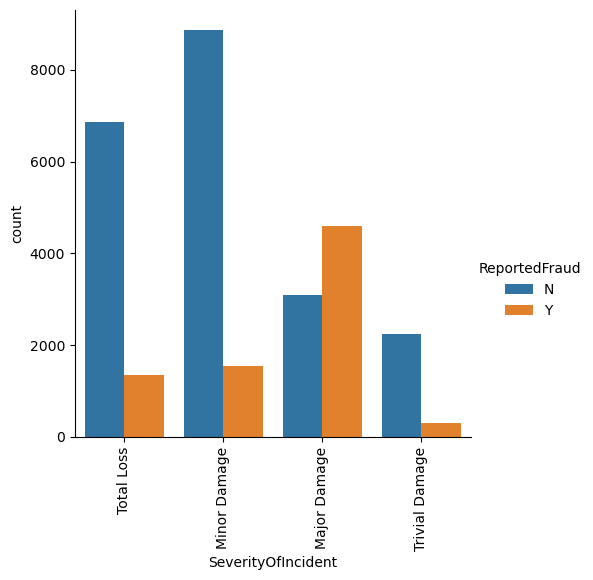

In [33]:
sns.catplot(data=df_new,x='SeverityOfIncident',hue='ReportedFraud',kind='count')
plt.xticks(rotation=90)

### iv)AuthoritiesContacted

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Police'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Fire'),
  Text(3, 0, 'Ambulance'),
  Text(4, 0, 'None')])

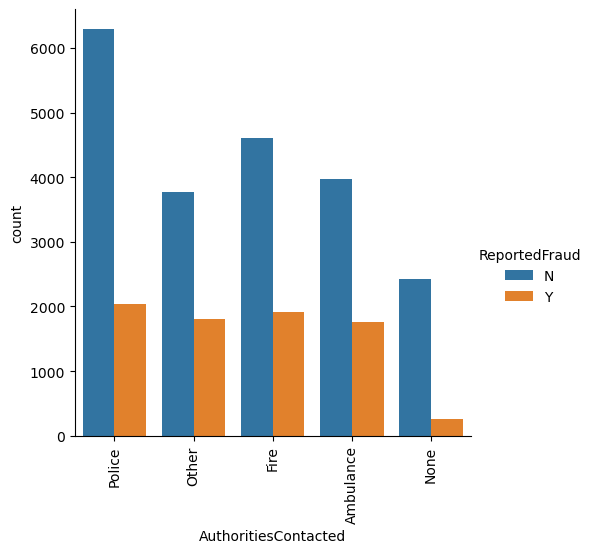

In [34]:
sns.catplot(data=df_new,x='AuthoritiesContacted',hue='ReportedFraud',kind='count')
plt.xticks(rotation=90)

### v)IncidentCity Column

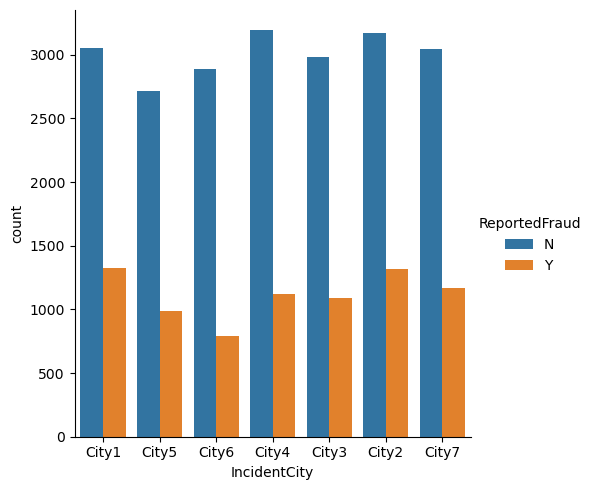

In [35]:
sns.catplot(data=df_new,x='IncidentCity',hue='ReportedFraud',kind='count')


### vi)NumberOfVehicles Column

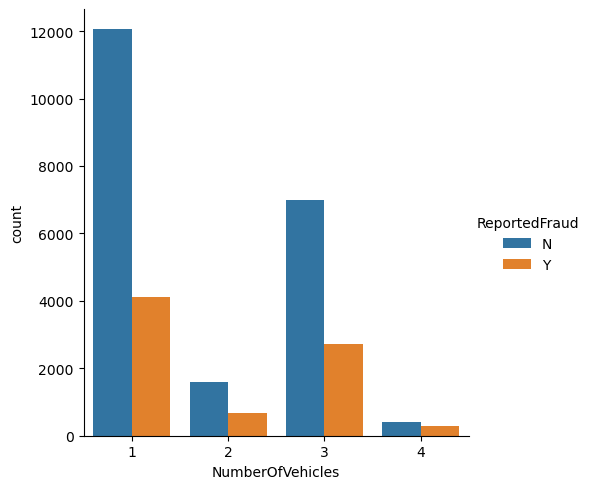

In [36]:
sns.catplot(data=df_new,x='NumberOfVehicles',hue='ReportedFraud',kind='count')

### vii)InsuredGender Column

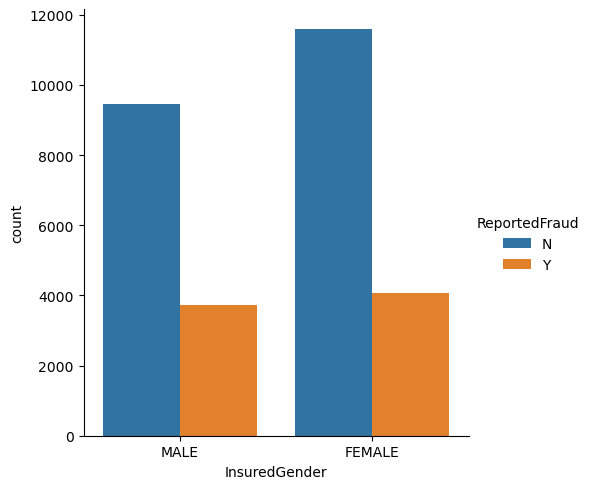

In [37]:
sns.catplot(data=df_new,x='InsuredGender',hue='ReportedFraud',kind='count')

### viii) InsuredAge 

<AxesSubplot:xlabel='InsuredAge', ylabel='Density'>

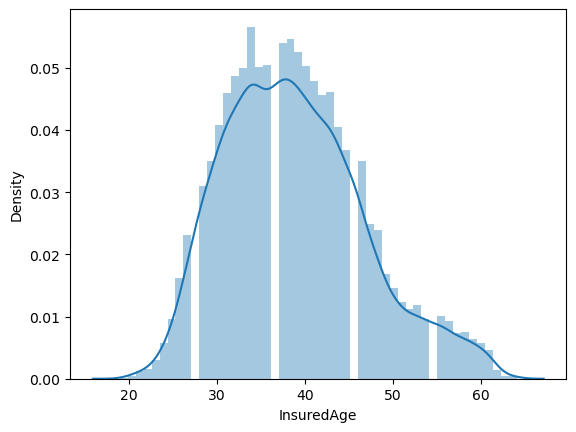

In [302]:
#df_new[['InsuredAge','AmountOfTotalClaim']].hist(figsize=(12,5),kde=True)
sns.distplot(df_new['InsuredAge'])

## Missing value Treatment

### i) Missing value treatment for 'PoliceReport' column

In [40]:
# We are going to predict police report column . Train claim dataset having this column.
#so we are going to take this dataset and make prediction  for the particular column
p1=pd.read_csv('Train_claim.csv')

In [41]:
p1.replace('?',np.nan,inplace=True)

In [42]:
cat=p1.select_dtypes(include=['object'])
cat.columns

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'PropertyDamage', 'Witnesses',
       'PoliceReport', 'AmountOfTotalClaim'],
      dtype='object')

In [43]:
#we take values from police report column which having not null values
#We take this value for training purpose
not_null=p1.loc[p1['PoliceReport'].notnull()]
not_null.shape

(19031, 19)

In [44]:
#copying original file for other process
n1=not_null.copy()

In [45]:
# Converting categorical to numerical 
cat_col=['DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'PropertyDamage', 'Witnesses',
       'PoliceReport', 'AmountOfTotalClaim']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_col:
    n1[col]= le.fit_transform(n1[col])

In [46]:
#Droping 'polciereport' column and assign to new valriable
not_null=not_null.drop(['PoliceReport'],axis=1)

#Assigning the numerical value for 'policereport' column
not_null['PoliceReport']=n1['PoliceReport']

In [47]:
not_null.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,PoliceReport
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,61382,15560,5919,39903,1
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,66755,11630,11630,43495,0
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,66243,12003,12003,42237,0
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,53544,8829,7234,37481,1
6,Cust10006,2015-01-30,Single Vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City4,Location 1440,20,1,NaN,0,2,77453,6476,12822,58155,0


In [48]:
#Creating model for predicting police report column

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [50]:
x=n1.drop(['PoliceReport','CustomerID'],axis=1)
y=n1['PoliceReport']

In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [52]:
# creating  logistic regression model

In [53]:
logi=LogisticRegression()
logi.fit(X_train,Y_train)

LogisticRegression()

In [54]:
pred_train=logi.predict(X_train)
pred_test=logi.predict(X_test)

In [55]:
print(accuracy_score(Y_train,pred_train))
print(accuracy_score(Y_test,pred_test))

0.5418345302738367
0.532563025210084


In [56]:
# Creating Decision tree model

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
clf=DecisionTreeClassifier(criterion='gini')

In [59]:
clf.fit(X_train,Y_train)
pred_train=clf.predict(X_train)
pred_test=clf.predict(X_test)

In [60]:
print(accuracy_score(Y_train,pred_train))
print(accuracy_score(Y_test,pred_test))

1.0
0.743172268907563


In [61]:
# Creating Random forest model

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
classi=RandomForestClassifier(n_estimators=40,criterion='entropy')

In [64]:
classi.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=40)

In [65]:
pred_train=classi.predict(X_train)
pred_test=classi.predict(X_test)

In [66]:
print(accuracy_score(Y_train,pred_train))
print(accuracy_score(Y_test,pred_test))

0.9997664506335027
0.8293067226890757


In [67]:
#we are successfully train the model.
#Now we need to predict our null data by using our model.For that we use isnull()
null=p1.loc[p1['PoliceReport'].isnull()]
null.shape

(9805, 19)

In [68]:
x1=null.drop(['PoliceReport','CustomerID'],axis=1)

In [69]:
# Coverting categorical into numerical
cat_col=['DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'PropertyDamage', 'Witnesses','AmountOfTotalClaim']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_col:
    x1[col]= le.fit_transform(x1[col])

In [70]:
#Predicting values for police report column
prediction=classi.predict(x1)

In [71]:
prediction

array([1, 1, 0, ..., 1, 0, 0])

In [72]:
null.drop(['PoliceReport'],axis=1,inplace=True)
null['PoliceReport']=prediction

In [73]:
n_final=pd.concat([not_null,null])
n_final.shape

(28836, 19)

In [74]:
n_final.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,PoliceReport
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,61382,15560,5919,39903,1
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,66755,11630,11630,43495,0
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,66243,12003,12003,42237,0
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,53544,8829,7234,37481,1
6,Cust10006,2015-01-30,Single Vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City4,Location 1440,20,1,NaN,0,2,77453,6476,12822,58155,0


In [75]:
#Drop old column and add new values to that column
df_new.drop(['PoliceReport'],axis=1,inplace=True)
df_new['PoliceReport']=n_final['PoliceReport']

### ii) Missing value treatment for 'TypeOfCollission' column

In [76]:
#we store rows based on Type of collission column which are not having null values
c1=p1.drop(['PoliceReport'],axis=1)
c1['PoliceReport']=n_final['PoliceReport']

In [77]:
coli=c1.loc[c1['TypeOfCollission'].notnull()]
coli.shape

(23674, 19)

In [78]:
coli_c=coli.copy()

In [79]:
cat_col=['DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'PropertyDamage', 'Witnesses', 'AmountOfTotalClaim']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_col:
    coli_c[col]= le.fit_transform(coli_c[col])


In [80]:
#Droping 'TypeOfCollission' column and assign to new valriable
coli=coli.drop(['TypeOfCollission'],axis=1)
coli['TypeOfCollission']=coli_c['TypeOfCollission']

In [81]:
x=coli_c.drop(['TypeOfCollission','CustomerID'],axis=1)
y=coli_c['TypeOfCollission']

In [82]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [83]:
# logistic regression model

In [84]:
logi1=LogisticRegression(max_iter=1000)
logi1.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [85]:
pred_train=logi.predict(X_train)
pred_test=logi.predict(X_test)

In [86]:
print(accuracy_score(Y_train,pred_train))
print(accuracy_score(Y_test,pred_test))

0.30540692762602084
0.3120777027027027


In [87]:
# Decision tree model

In [88]:
clf1=DecisionTreeClassifier(criterion='gini')

In [89]:
clf1.fit(X_train,Y_train)
pred_train=clf1.predict(X_train)
pred_test=clf1.predict(X_test)

In [90]:
print(accuracy_score(Y_train,pred_train))
print(accuracy_score(Y_test,pred_test))

0.9999530648643574
0.6203547297297297


In [91]:
classifier=RandomForestClassifier(n_estimators=30,criterion='entropy')

In [92]:
classifier.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30)

In [93]:
classifier.fit(X_train,Y_train)
pred_train=classifier.predict(X_train)
pred_test=classifier.predict(X_test)

In [94]:
print(accuracy_score(Y_train,pred_train))
print(accuracy_score(Y_test,pred_test))

0.9991551675584343
0.7124155405405406


In [95]:
co=c1.loc[c1['TypeOfCollission'].isnull()]

In [96]:
co.shape

(5162, 19)

In [97]:
co2=co.drop(['TypeOfCollission','CustomerID'],axis=1)

In [98]:
cat_col=['DateOfIncident', 'TypeOfIncident','SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'PropertyDamage', 'Witnesses','AmountOfTotalClaim']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_col:
    co2[col]= le.fit_transform(co2[col])


In [99]:
prediction1=classifier.predict(co2)

In [100]:
prediction1

array([1, 1, 1, ..., 1, 0, 1])

In [101]:
co.drop(['TypeOfCollission'],axis=1,inplace=True)
co['TypeOfCollission']=prediction1

In [102]:
n_final1=pd.concat([coli,co])

In [103]:
n_final1.shape

(28836, 19)

In [104]:
#Drop old column and add new values to that column
df_new.drop(['TypeOfCollission'],axis=1,inplace=True)
df_new['TypeOfCollission']=n_final1['TypeOfCollission']

### iii) Missing value treatment for 'PropertyDamage'

In [105]:
#we drop the police report and type of collision column and add newly predicted column
pr1=p1.drop(['PoliceReport','TypeOfCollission'],axis=1)
pr1['PoliceReport']=n_final['PoliceReport']
pr1['TypeOfCollission']=n_final1['TypeOfCollission']

In [106]:
#we get rows which having null values
pr=pr1.loc[pr1['PropertyDamage'].notnull()]
pr.shape

(18377, 19)

In [107]:
pro=pr.copy()

In [108]:
cat_col=['DateOfIncident', 'TypeOfIncident',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'PropertyDamage', 'Witnesses', 'AmountOfTotalClaim']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_col:
    pro[col]= le.fit_transform(pro[col])

In [109]:
#Droping 'Property of damage' column and assign to new valriable
pr=pr.drop(['PropertyDamage'],axis=1)
pr['PropertyDamage']=pro['PropertyDamage']

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [111]:
x=pro.drop(['PropertyDamage','CustomerID'],axis=1)
y=pro['PropertyDamage']

In [112]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [113]:
logi2=LogisticRegression()
logi2.fit(X_train,Y_train)

LogisticRegression()

In [114]:
pred_train=logi2.predict(X_train)
pred_test=logi2.predict(X_test)

In [115]:
print(accuracy_score(Y_train,pred_train))
print(accuracy_score(Y_test,pred_test))

0.5280851321119777
0.5359085963003264


In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
clf2=DecisionTreeClassifier(criterion='gini')

In [118]:
clf2.fit(X_train,Y_train)
pred_train=clf2.predict(X_train)
pred_test=clf2.predict(X_test)

In [119]:
print(accuracy_score(Y_train,pred_train))
print(accuracy_score(Y_test,pred_test))

1.0
0.735038084874864


In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
classifier1=RandomForestClassifier(n_estimators=40,criterion='entropy')

In [122]:
classifier1.fit(X_train,Y_train)
pred_train=classifier1.predict(X_train)
pred_test=classifier1.predict(X_test)

In [123]:
print(accuracy_score(Y_train,pred_train))
print(accuracy_score(Y_test,pred_test))

0.9996976842614427
0.8373231773667029


In [124]:
prnull=pr1.loc[pr1['PropertyDamage'].isnull()]
prnull.shape

(10459, 19)

In [125]:
prn1=prnull.drop(['PropertyDamage','CustomerID'],axis=1)

In [126]:
cat_col=['DateOfIncident', 'TypeOfIncident','SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'Witnesses','AmountOfTotalClaim']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_col:
    prn1[col]= le.fit_transform(prn1[col])

In [127]:
prediction2=classifier1.predict(prn1)

In [128]:
prnull.drop(['PropertyDamage'],axis=1,inplace=True)
prnull['PropertyDamage']=prediction2

In [129]:
prnull.head()

,CustomerID,DateOfIncident,TypeOfIncident,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,PoliceReport,TypeOfCollission,PropertyDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Total Loss,Police,State7,City1,Location 1311,17,3,1,0,65501,13417,6071,46013,1,2,1
6,Cust10006,2015-01-30,Single Vehicle Collision,Minor Damage,Ambulance,State5,City4,Location 1440,20,1,0,2,77453,6476,12822,58155,0,0,1
7,Cust10007,2015-01-12,Single Vehicle Collision,Minor Damage,Police,State5,City3,Location 1440,18,1,0,2,60569,5738,7333,47498,0,0,0
15,Cust10017,2015-02-28,Multi-vehicle Collision,Total Loss,Other,State7,City2,Location 1677,12,1,1,0,61697,6172,6167,49358,1,2,0
18,Cust10021,2015-01-03,Vehicle Theft,Trivial Damage,None,State4,City5,Location 1449,10,1,2,1,6190,619,1208,4363,0,1,0


In [130]:
n_final2=pd.concat([pr,prnull])

In [131]:
#Drop old column and add new values to that column
df_new.drop(['PropertyDamage'],axis=1,inplace=True)
df_new['PropertyDamage']=n_final2['PropertyDamage']

In [132]:
df_new.head()

,CustomerID,DateOfIncident,TypeOfIncident,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,...,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleModel,VehicleMake,VehicleYOM,ReportedFraud,PoliceReport,TypeOfCollission,PropertyDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Total Loss,Police,State7,City1,Location 1311,17.0,3,...,0,not-in-family,Vehicle26917,A5,Audi,2008,N,1,2,1
1,Cust10001,2015-02-02,Multi-vehicle Collision,Total Loss,Police,State7,City5,Location 1311,10.0,3,...,0,not-in-family,Vehicle15893,A5,Audi,2006,N,1,2,1
2,Cust10002,2015-01-15,Single Vehicle Collision,Minor Damage,Other,State8,City6,Location 2081,22.0,1,...,0,wife,Vehicle5152,Jetta,Volkswagen,1999,N,0,2,1
3,Cust10003,2015-01-19,Single Vehicle Collision,Minor Damage,Other,State9,City6,Location 2081,22.0,1,...,0,own-child,Vehicle37363,Jetta,Volkswagen,2003,N,0,2,1
4,Cust10004,2015-01-09,Single Vehicle Collision,Minor Damage,Fire,State8,City6,Location 1695,10.0,1,...,4279863,unmarried,Vehicle28633,CRV,Toyota,2010,N,1,1,0


## Imputing other missing values

In [133]:
df_new.isnull().sum()

CustomerID                      0
DateOfIncident                  0
TypeOfIncident                  0
SeverityOfIncident              0
AuthoritiesContacted            0
IncidentState                   0
IncidentCity                    0
IncidentAddress                 0
IncidentTime                   31
NumberOfVehicles                0
BodilyInjuries                  0
Witnesses                      46
AmountOfTotalClaim              0
AmountOfInjuryClaim             0
AmountOfPropertyClaim           0
AmountOfVehicleDamage           0
InsuredAge                      0
InsuredZipCode                  0
InsuredGender                  30
InsuredEducationLevel           0
InsuredOccupation               0
InsuredHobbies                  0
CapitalGains                    0
CapitalLoss                     0
Country                         2
InsurancePolicyNumber           0
CustomerLoyaltyPeriod           0
DateOfPolicyCoverage            0
InsurancePolicyState            0
Policy_Combine

In [134]:
df_new['PolicyAnnualPremium'].fillna(df_new['PolicyAnnualPremium'].median(),inplace=True)

df_new['InsuredGender'].fillna(df_new['InsuredGender'].mode()[0],inplace=True)

df_new['Witnesses'].fillna(df_new['Witnesses'].mode()[0],inplace=True)

df_new['VehicleMake'].fillna(df_new['VehicleMake'].mode()[0],inplace=True)

df_new['AmountOfTotalClaim'].replace(-2,df_new['AmountOfTotalClaim'].median(),inplace=True)

df_new['IncidentTime'].fillna(df_new['IncidentTime'].median(),inplace=True)

df_new['Country'].fillna(df_new['Country'].mode(),inplace=True)

In [135]:
df_new.shape

(28836, 42)

## Finding Duplicate values

In [136]:
#We check whether it have duplicate value or not
df_new.duplicated().sum()

0

## Dropping columns 

In [137]:
df_new1=df_new.drop(['CustomerID','IncidentState','VehicleID','IncidentCity','IncidentAddress','InsuredZipCode','Country',
            'InsurancePolicyNumber','DateOfIncident','DateOfPolicyCoverage','InsurancePolicyState',
            'InsuredRelationship'],axis=1)

## Converting categorical to numerical

In [138]:
df_new1.dtypes

TypeOfIncident                 object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentTime                  float64
NumberOfVehicles                int64
BodilyInjuries                  int64
Witnesses                      object
AmountOfTotalClaim            float64
AmountOfInjuryClaim             int64
AmountOfPropertyClaim           int64
AmountOfVehicleDamage           int64
InsuredAge                      int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                    int64
CapitalLoss                     int64
CustomerLoyaltyPeriod           int64
Policy_CombinedSingleLimit     object
Policy_Deductible               int64
PolicyAnnualPremium           float64
UmbrellaLimit                   int64
VehicleModel                   object
VehicleMake                    object
VehicleYOM                     object
ReportedFrau

In [139]:
#We are just change the categorical type into integer
df_new1['Witnesses']=df_new1['Witnesses'].astype('int')

In [140]:
ob1=df_new1.select_dtypes(include=['object'])
ob1.columns

Index(['TypeOfIncident', 'SeverityOfIncident', 'AuthoritiesContacted',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'Policy_CombinedSingleLimit', 'VehicleModel',
       'VehicleMake', 'VehicleYOM', 'ReportedFraud'],
      dtype='object')

In [141]:
cat_col=['TypeOfIncident', 'SeverityOfIncident',
       'AuthoritiesContacted', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation',
       'Policy_CombinedSingleLimit','InsuredHobbies',
       'VehicleModel', 'VehicleMake',
       'VehicleYOM', 'ReportedFraud']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_col:
    df_new1[col]= le.fit_transform(df_new1[col])

In [142]:
df_new1.shape

(28836, 30)

In [143]:
df_new1.to_csv('cleaned8.csv',index=False)

In [144]:
df_new1.columns

Index(['TypeOfIncident', 'SeverityOfIncident', 'AuthoritiesContacted',
       'IncidentTime', 'NumberOfVehicles', 'BodilyInjuries', 'Witnesses',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'InsuredAge', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'CapitalGains', 'CapitalLoss', 'CustomerLoyaltyPeriod',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'VehicleModel', 'VehicleMake',
       'VehicleYOM', 'ReportedFraud', 'PoliceReport', 'TypeOfCollission',
       'PropertyDamage'],
      dtype='object')

# 3)Creating ML model

### Training and testing data

In [145]:
test_data=pd.read_csv('cleanedtes7.csv')
train_data=pd.read_csv('cleaned8.csv')

In [146]:
test_data.head()

,CustomerID,TypeOfIncident,SeverityOfIncident,AuthoritiesContacted,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,VehicleModel,VehicleMake,VehicleYOM,PoliceReport,TypeOfCollission,PropertyDamage
0,Cust10008,0,1,0,4.0,3,0,0,68354.0,6835,...,6,2000,1006.00,0,28,13,0,0,0,0
1,Cust10010,2,1,1,16.0,1,1,1,55270.0,8113,...,1,500,1279.17,0,34,9,11,0,1,1
2,Cust10015,0,1,4,20.0,3,0,1,59515.0,7490,...,5,1000,1454.67,1235986,19,11,15,1,1,0
3,Cust10020,3,3,2,10.0,1,2,1,4941.0,494,...,8,2000,1287.76,5873212,32,0,14,1,1,1
4,Cust1003,0,1,4,7.0,3,2,3,34650.0,7700,...,1,2000,1413.14,5000000,30,4,12,0,1,0


In [147]:
train_data.shape

(28836, 30)

In [148]:
test_data.shape

(8912, 30)

In [149]:
x=train_data.drop(['ReportedFraud'],axis=1)
y=train_data['ReportedFraud']

In [150]:
y.shape

(28836,)

## Feature scaling

In [151]:
from sklearn.preprocessing import MinMaxScaler

In [152]:
mm=MinMaxScaler()
x_flat=mm.fit_transform(x)

# 4)Cross validation 

In [153]:
from sklearn.model_selection import cross_val_score

In [196]:
l=cross_val_score(LogisticRegression(),x_flat,y,cv=5)
l.mean()

0.7712582133700112

In [197]:
from sklearn.neighbors import KNeighborsClassifier
k=cross_val_score(KNeighborsClassifier(),x_flat,y,cv=5)
k.mean()

0.8935009549045972

In [198]:
d=cross_val_score(DecisionTreeClassifier(),x_flat,y,cv=5)
d.mean()

0.8249401516159065

In [199]:
r=cross_val_score(RandomForestClassifier(),x_flat,y,cv=5)
r.mean()

0.9177071010221965

In [200]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [201]:
ad=cross_val_score(AdaBoostClassifier(),x_flat,y,cv=5)
ad.mean()

0.8267100500311807

In [202]:
g=cross_val_score(GradientBoostingClassifier(),x_flat,y,cv=5)
g.mean()

0.8561175943186242

# 5)Hyperparameter Tuning

In [206]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(RandomForestClassifier(criterion='entropy'),{
    'n_estimators': [50,100,200,500],
    'max_features':['auto','sqrt'],
    'min_samples_split':[2,3,4,5,6]
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=3
)

In [207]:
rs.fit(x_flat,y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
                   n_iter=3,
                   param_distributions={'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [50, 100, 200, 500]})

In [208]:
d21=pd.DataFrame(rs.cv_results_)
d21[['param_n_estimators','param_max_features','param_min_samples_split','mean_test_score']]

,param_n_estimators,param_max_features,param_min_samples_split,mean_test_score
0,100,sqrt,2,0.918574
1,500,sqrt,4,0.920759
2,200,auto,5,0.920377


In [209]:
classifir1=RandomForestClassifier(n_estimators=200,max_features='auto',criterion='entropy',min_samples_split=5)
classifir1.fit(x_flat,y)


RandomForestClassifier(criterion='entropy', min_samples_split=5,
                       n_estimators=200)

In [210]:
y_f=mm.fit_transform(test_data.drop(['CustomerID'],axis=1))

In [211]:
pred_test=classifir1.predict(y_f)

In [212]:
count=np.bincount(pred_test)

In [213]:
count[1]

1320

In [167]:
#Converting predicted values into dataframe

In [168]:
final_df= pd.DataFrame({'CustomerID': test_data['CustomerID'],'ReportedFraud': pred_test})
final_df.to_csv('model_final_ajith14.csv',index=False)

In [169]:
final_df

,CustomerID,ReportedFraud
0,Cust10008,0
1,Cust10010,0
2,Cust10015,0
3,Cust10020,0
4,Cust1003,0
...,...,...
8907,Cust9984,0
8908,Cust9986,0
8909,Cust9990,0
8910,Cust9995,0


# Conclusion